In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import datetime as dt
import calendar
import re
import warnings
import ticktock

%matplotlib inline

# Gettin' Started

In [23]:
data_path = "./Winter-2018-Data/"
general = pd.read_csv(data_path + "general.csv", skiprows=1,
                      names=["Event", "Start_time", "End_time"])

In [24]:
general = ticktock.convert_columns(general)

quarter_start = "01/03/2018"
quarter_end = "03/23/2018"

general = ticktock.filter_by_date(general, quarter_start, quarter_end)
general.shape

(158, 3)

In [25]:
general.is_copy = False
general['total_time'] = general.apply(lambda x: ticktock.total_time(x), axis=1)

# Study Analysis

In [26]:
subjects = ["MATH 164", "STATS 100B", "STATS 102A"]
total_times = []

In [27]:
general.is_copy = False

for i, subject in enumerate(subjects):
    study_subject = general.apply(lambda x: ticktock.is_studying(x['Event'], subject), axis=1)
    general['Studying {}'.format(subject)] = study_subject
    
    total_hours = general.loc[general['Studying {}'.format(subject)], 'total_time'].sum()
    total_times.append(total_hours)
    print("Total time studying {}: {}".format(subject, total_hours))

Total time studying MATH 164: 61.0
Total time studying STATS 100B: 99.5
Total time studying STATS 102A: 39.5


In [28]:
# set matplotlib parameters
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

plt.style.use('seaborn-darkgrid')

tropical_colors = ["#3D84A8", "#FF7E67", "#FFB400"]

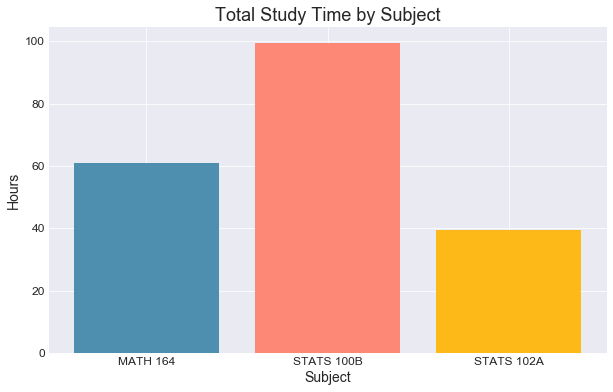

In [29]:
fig, ax = ticktock.create_plot(figsize=(10, 6), title="Total Study Time by Subject", 
                               xlabel="Subject", ylabel="Hours")

g = ax.bar(subjects, total_times, color=tropical_colors, alpha=0.9)

plt.show()

In [30]:
# change index to day of event
general = general.set_index(['Start_time'])
general.index = general.index.date

## Studying Trends

In [35]:
math_164_data = general.loc[general['Studying MATH 164'], :]
stats_100b_data = general.loc[general['Studying STATS 100B'], :]
stats_102a_data = general.loc[general['Studying STATS 102A'], :]
all_studying_data = general.loc[(general['Studying MATH 164'] | \
                                 general['Studying STATS 100B'] | general['Studying STATS 102A']), :]

math_164_by_day = math_164_data.groupby(math_164_data.index).sum()
stats_100b_by_day = stats_100b_data.groupby(stats_100b_data.index).sum()
stats_102a_by_day = stats_102a_data.groupby(stats_102a_data.index).sum()
all_studying_data = all_studying_data.groupby(all_studying_data.index).sum()

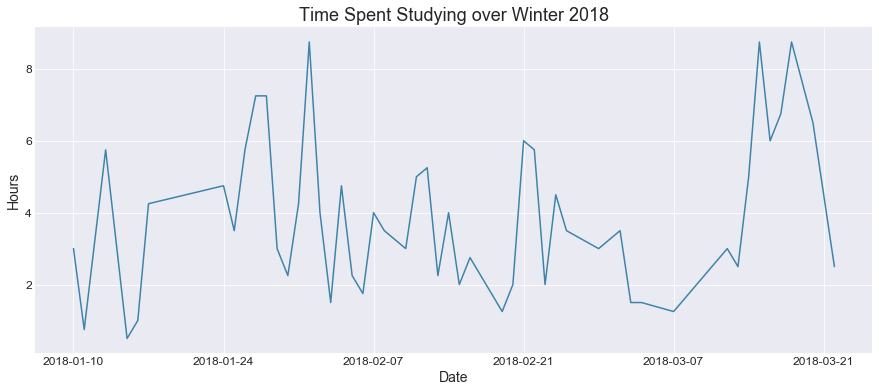

In [36]:
fig, ax = ticktock.create_plot(title="Time Spent Studying over Winter 2018", ylabel="Hours", xlabel="Date")

ax.plot(all_studying_data['total_time'], color=tropical_colors[0]);

plt.show()

### Breaking it down by subject

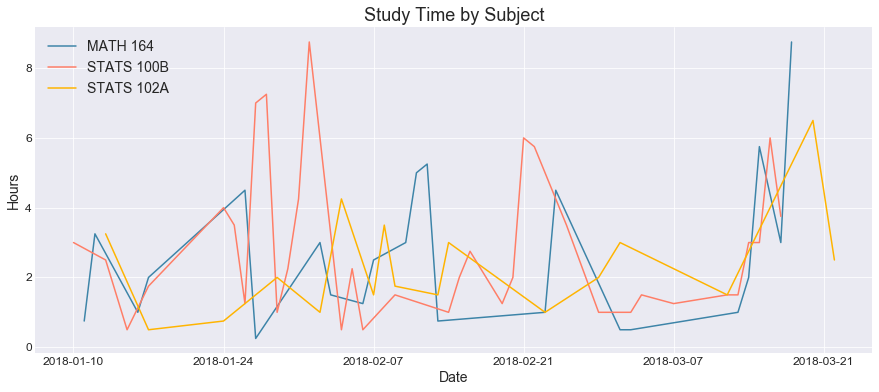

In [38]:
fig, ax = ticktock.create_plot(title="Study Time by Subject", xlabel="Date", ylabel="Hours")

for i, ts in enumerate([math_164_by_day, stats_100b_by_day, stats_102a_by_day]):
    ax.plot(ts['total_time'], color=tropical_colors[i])
    
ax.legend(subjects)

plt.show()